# CS 178 HW 4

 Malav Pandya 

 91044866

In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

## Problem 1:

### (a)

Define the entropy function:

In [2]:
def H(a,b):
    compl = 1-(a/b);
    h = (a/b) * np.log2(b/a) + (compl) * np.log2(1/compl);
    return h;

Given P(y=1) = 4/10 = 2/5 = 0.4,

Calculate entropy of y:

In [3]:
Hy = H(4,10);
print("H(4/10) = " + str(H(4,10)));

H(4/10) = 0.970950594455


### (b)

In [4]:
x1_IG = Hy - (2/5 * H(1,4) + 3/5 * H(1,2));
print("x1_IG = "+ str(x1_IG));

x2_IG = Hy - (2/5 * H(4,5) + 3/5 * 0);
print("x2_IG = "+ str(x2_IG));

x3_IG = Hy - (2/5 * H(1,3) + 3/5 * H(3,7));
print("x3_IG = "+ str(x3_IG));

x4_IG = Hy - (2/5 * H(2,3) + 3/5 * H(2,7));
print("x4_IG = "+ str(x4_IG));

x5_IG = Hy - (2/5 * H(3,7) + 3/5 * H(1,3));
print("x5_IG = "+ str(x5_IG));

x1_IG = 0.046439344671
x2_IG = 0.6821793565
x3_IG = 0.0124953792123
x4_IG = 0.0857599196929
x5_IG = 0.0258818396083


Based on the information gain, I would split on x2 first.

### (c)

When x2 = 1, y = 1

![alt text](X2.png)

When x1 = 1, y = 1

![alt text](x1.png)

When x4 = 1, y = -1

When x4 = 0, y = 1

The full decision tree is shown below:

![alt text](fulltree.png)

## Problem 2:

### (a)

In [5]:
X = np.genfromtxt("nX_train.txt",delimiter=None) 
Xt = X[1:10000,:];
Xv = X[10001:20000,:];
Y = np.genfromtxt("Y_train.txt",delimiter=None) 
Yt = Y[1:10000,np.newaxis];
Yv = Y[10001:20000,];

### (b)

In [6]:
learner = ml.dtree.treeClassify(Xt,Yt, maxDepth=50);
#error on training
YtHat = learner.predict(Xt);
length = len(YtHat);
err = 0
for j in range(0,length):
    err += 1 if (YtHat[j] != Yt[j]) else 0 
tr_err = err/(length);

print("Training Error = " + str(tr_err));

#error on validation                
YvHat = learner.predict(Xv);
length = len(YvHat);
err = 0
for j in range(0,length):
    err += 1 if (YvHat[j] != Yv[j]) else 0 
val_err = err/(length);

print("Validation Error = " + str(val_err));

Training Error = 0.0047004700470047005
Validation Error = 0.3785378537853785


### (c)

In [7]:
errTrain = np.empty([16,1]);
maxDepth = np.linspace(0, 15, num=16);
maxDepth = maxDepth[:, np.newaxis];
print("Training Errors: ")
for i,k in enumerate(maxDepth):
    learner = ml.dtree.treeClassify(Xt,Yt, maxDepth=k);
    Yhat = learner.predict(Xt) 
    err = 0
    for j in range(0,len(Yhat)):
        err += 1 if (Yhat[j] != Yt[j]) else 0 
    fracterr = err/(len(Yhat))                 
    errTrain[i] = fracterr
    print(str(i) + ": " + str(fracterr));

plt.semilogx(maxDepth, errTrain, label = 'Training Err', color = 'r');

print("Validation Errors: ")
for i,k in enumerate(maxDepth):
    learner = ml.dtree.treeClassify(Xt,Yt, maxDepth=k);
    Yhat = learner.predict(Xv) 
    err = 0
    for j in range(0,len(Yhat)):
        err += 1 if (Yhat[j] != Yv[j]) else 0 
    fracterr = err/(len(Yhat))                 
    errTrain[i] = fracterr
    print(str(i) + ": " + str(fracterr));

plt.semilogx(maxDepth, errTrain, label = 'Validation Err', color = 'g');

Training Errors: 
0: 0.34173417341734175
1: 0.34173417341734175
2: 0.32223222322232226
3: 0.3132313231323132
4: 0.31053105310531054
5: 0.30083008300830083
6: 0.2948294829482948
7: 0.28722872287228723
8: 0.27682768276827685
9: 0.2632263226322632
10: 0.24582458245824582
11: 0.23072307230723071
12: 0.21002100210021002
13: 0.18821882188218822
14: 0.16561656165616562
15: 0.1468146814681468
Validation Errors: 
0: 0.34193419341934195
1: 0.34193419341934195
2: 0.3191319131913191
3: 0.3126312631263126
4: 0.31523152315231523
5: 0.3102310231023102
6: 0.3102310231023102
7: 0.3118311831183118
8: 0.3122312231223122
9: 0.3187318731873187
10: 0.32413241324132414
11: 0.3256325632563256
12: 0.33703370337033706
13: 0.33893389338933894
14: 0.34783478347834784
15: 0.35963596359635963


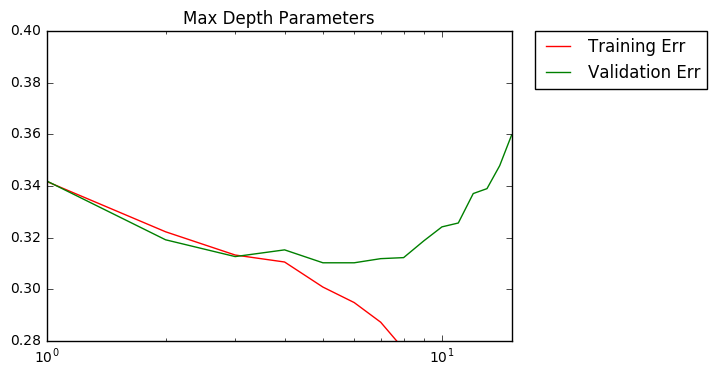

In [8]:
plt.axis([0, 15, 0.28, 0.4])
plt.title("Max Depth Parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The complexity is increasing with the depth cutoff as it can be seen midway in the graph above, the training error decreases while the validation error rises. Complexity rises with size of the tree. Max depth is used to control overfitting. The model begins overfitting at depth = 7. I would pick maxdepth = 7 as the best. 

### (d) 

Training Errors: 
[4]: 0.0962096209620962
[16]: 0.22622262226222623
[64]: 0.2899289928992899
[256]: 0.30853085308530853
[1024]: 0.32223222322232226
[4096]: 0.34173417341734175
Validation Errors: 
[4]: 0.3777377737773777
[16]: 0.35693569356935695
[64]: 0.3274327432743274
[256]: 0.31723172317231724
[1024]: 0.3191319131913191
[4096]: 0.34193419341934195


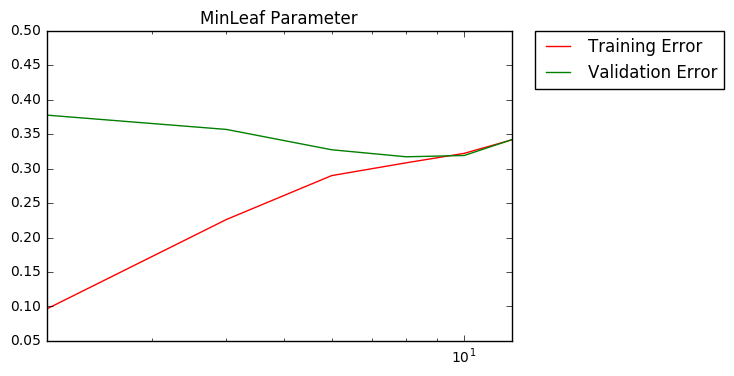

In [9]:
errTrain = np.empty([6,1]);
minLeaf = np.linspace(2,12, num = 6, dtype = "int16");
minLeaf = minLeaf[:, np.newaxis];

print("Training Errors: ")
for i,k in enumerate(minLeaf):
    learner = ml.dtree.treeClassify(Xt,Yt, maxDepth=50, minLeaf = 2**k);
    Yhat = learner.predict(Xt) 
    err = 0
    for j in range(0,len(Yhat)):
        err += 1 if (Yhat[j] != Yt[j]) else 0 
    fracterr = err/(len(Yhat))                 
    errTrain[i] = fracterr
    print(str(2**k) + ": " + str(fracterr));
    
plt.figure()
plt.semilogx(minLeaf, errTrain, label = "Training Error", color = 'r')

print("Validation Errors: ")
for i,k in enumerate(minLeaf):
    learner = ml.dtree.treeClassify(Xt,Yt, maxDepth=50, minLeaf = 2**k);
    Yhat = learner.predict(Xv) 
    err = 0
    for j in range(0,len(Yhat)):
        err += 1 if (Yhat[j] != Yv[j]) else 0 
    fracterr = err/(len(Yhat))                 
    errTrain[i] = fracterr
    print(str(2**k) + ": " + str(fracterr));

plt.semilogx(minLeaf, errTrain, label = "Validation Error", color = 'g');
plt.axis([2, 12, 0.05, 0.5])
plt.title("MinLeaf Parameter")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From the start, the complexity decreases as minLeaf grows but only up to a certain point, then it becomes constant. The model overfits for small values of minLeaf, until it becomes constant and the tree stops learning data. I would pick minLeaf = 2^8 for complexity control. 

### (f)

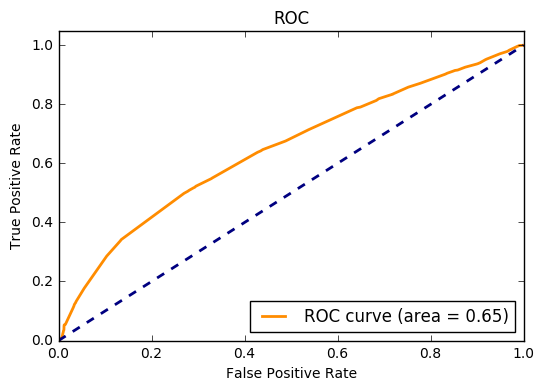

In [10]:
learner = ml.dtree.treeClassify(Xt,Yt, maxDepth = 7); 
fpr,tpr,_ = learner.roc(Xv,Yv);
roc_auc = learner.auc(Xv,Yv);

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### (g)

In [11]:
#learner = ml.dtree.treeClassify(Xt,Yt,  maxDepth = 7); 
#Ypred = learner.predictSoft( Xte )
#np.savetxt('Yhat_dtree.txt',
#np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
#'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

Kaggle:

![alt text]( kaggle1.png)

My kaggle AUC score on the test data is very close to my estimated AUC for the validation data. 

## Problem 3:

### (a)

In [12]:
X = np.genfromtxt("nX_train.txt",delimiter=None) 
Xt = X[1:10000,:];
Xv = X[10501:11000,:];
Y = np.genfromtxt("Y_train.txt",delimiter=None) 
Yt = Y[1:10000,np.newaxis];
Yv = Y[10501:11000,];

In [13]:
m,n = Xt.shape
nUse = 500;
nBag = 25; 
classifiers = [ None ] * nBag 

for i in range(nBag):
    ind = np.floor( m * np.random.rand(nUse) ).astype(int) 
    Xi, Yi = Xt[ind,:] , Yt[ind] 
    classifiers[i] = ml.dtree.treeClassify(Xi, Yi, nFeatures = 5) 

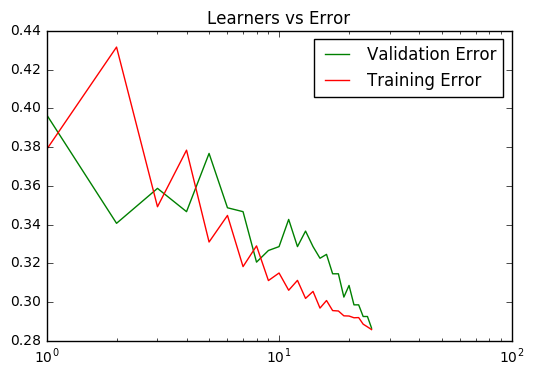

In [14]:
#on validation data
mTest = Xv.shape[0];
nBag = np.arange(1,26);
nBag_err = [None] * 25;
mini = 1;
for ii in range(0,25):
    predict = np.zeros( (mTest, nBag[ii]) ) 
    for i in range(0,nBag[ii]):
        predict[:,i] = classifiers[i].predict(Xv); 
    predict = np.mean(predict, axis=1) > 0.5;
    err = 0
    for j in range(0,mTest):
        err += 1 if (predict[j] != Yv[j]) else 0 
    nBag_err[ii] = err/(mTest);
    
plt.figure()
plt.semilogx(nBag, nBag_err, label = "Validation Error", color = 'g')


mTest = Xt.shape[0];
nBag = np.arange(1,26);
nBag_err = [None] * 25;
for ii in range(0,25):
    predict = np.zeros( (mTest, nBag[ii]) ) 
    for i in range(0,nBag[ii]):
        predict[:,i] = classifiers[i].predict(Xt); 
    predict = np.mean(predict, axis=1);
    for k in range(0,mTest):
        if(predict[k] >= 0.5):
            predict[k] = 1;
        else:
            predict[k] = 0;
    err = 0
    for j in range(0,mTest):
        err += 1 if (predict[j] != Yt[j]) else 0 
    nBag_err[ii] = err/(mTest);

plt.semilogx(nBag, nBag_err, label = "Training Error", color = 'r');
plt.title("Learners vs Error");
plt.legend(loc = "upper right");
plt.show()

### (b)

Ensemble for validation:

In [15]:
Xv = X[10001:20000,:];
Yv = Y[10001:20000,];

In [16]:
m,n = Xt.shape
nUse = 10000;
nBag = 25; 
classifiers = [ None ] * nBag 

for i in range(0,nBag):
    ind = np.floor( m * np.random.rand(nUse) ).astype(int) 
    Xi, Yi = Xt[ind,:] , Yt[ind] 
    classifiers[i] = ml.dtree.treeClassify(Xi, Yi, nFeatures = 5) 

In [17]:
#preds = np.zeros( (Xte.shape[0], nBag) )
#for i in range(0,nBag):
    #pred = classifiers[i].predictSoft(Xte); # Apply each classifier
    #pred = pred[:,1];
    #preds[:,i] = pred ;

#means = np.mean(preds,axis=1)

#np.savetxt('Yhat_dtree.txt',
#np.vstack( (np.arange(len(means)) , means) ).T,
#'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

AUC for validation:

(I created a ens_auc method similar to auc in base.py which estimates the auc of ensembles)

In [18]:
auc = classifiers[0].ens_auc(Xv,Yv,classifiers,nBag);
print("auc = " + str(auc));

auc = 0.668469890679


Kaggle:

![alt text](kaggle2.png)

Again, my kaggle AUC score on the test data is very close to my estimated AUC for the validation data. 